In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy
import numpy as np
import glob
from scipy.stats import mannwhitneyu
from matplotlib.pyplot import subplot_mosaic as mosaic
import matplotlib.transforms as mtransforms
import math
import matplotlib

### not finished yet
missing: plot mismatches. Add line to histograms, like in modmatcher paper

In [2]:
# list genes (ensembl ids) that were used as sex markers in MODMatcher paper (pmid 25122495)
gene = 'ENSG00000129824'
ct_sels_init = ['BRCA_metabric', 'BRCA', 'CESC', 'COAD', 'GBM', 'HNSC', 'KIRC', 'KIRP', 'LUSC', 'PCPG', 'READ', 'STAD']
num_buckets = 10

In [3]:
def align(pheno, expr):
    keep = pheno.index.isin(expr.index)
    pheno = pheno[keep]
    pheno = pheno[pheno.index.isin(expr.index)]
    samples = pheno.index            
    expr = expr.loc[samples]
    expr = expr.loc[:, (expr.std() != 0)]
    pheno = pheno[pheno.index.isin(expr.index)]
    return pheno, expr

def get_expression_data(cohort):
    try:
        expression_data = pd.read_csv(os.path.join(os.getcwd(), 'datasets', f'TCGA-{cohort}.htseq_fpkm.tsv'), sep='\t', header=0, index_col=0)
    except:
        expression_data = pd.read_csv(os.path.join(os.getcwd(), 'datasets', 'brca_metabric.tsv'), sep='\t', header=0, index_col=0)
    expression_data.columns = expression_data.columns.str.split('.').str[0].tolist()
    return expression_data

def get_pheno_data(cohort):
    try:
        tissue_type_field, tissue_type = 'sample_type.samples', 'Primary Tumor'
        pheno_data = pd.read_csv(os.path.join(os.getcwd(), 'datasets', f'TCGA-{cohort}.GDC_phenotype.tsv'), sep='\t', header=0, index_col='submitter_id.samples')
    except:
        tissue_type_field, tissue_type = 'Sample Type', 'Primary'
        pheno_data = pd.read_csv(os.path.join(os.getcwd(), 'datasets', 'metabric_brca_pheno.tsv'), sep='\t', header=0, index_col=0)
    assert len(pheno_data.iloc[0]) == len(pheno_data.iloc[0].values)
    pheno_data['cohort'] = str(cohort)
    pheno_data =  pheno_data[pheno_data[tissue_type_field] == tissue_type]
    return pheno_data

BRCA_metabric
possible mismatches, females: 0
possible mismatches, men: 0

max female: 6.2765191802119
min male: nan


<ipython-input-4-68464d3a0fdd>:42: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.swarmplot(expr_f, x=gene, ax=axs2[j,i], hue='mismatch', color='red', palette=sns.color_palette("Set2"), size=4, legend=False)
<ipython-input-4-68464d3a0fdd>:43: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(expr_m, x=gene, ax=axs2[j,i], hue='mismatch', color='blue', palette=sns.color_palette("Set1"), size=4, legend=False)
<ipython-input-4-68464d3a0fdd>:43: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.swarmplot(expr_m, x=gene, ax=axs2[j,i], hue='mismatch', color='blue', palette=sns.color_palette("Set1"), size=4, legend=False)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)




BRCA
possible mismatches, females: 0
possible mismatches, men: 0

max female: 2.3810767641515014
min male: 5.703854181966997


<ipython-input-4-68464d3a0fdd>:42: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.swarmplot(expr_f, x=gene, ax=axs2[j,i], hue='mismatch', color='red', palette=sns.color_palette("Set2"), size=4, legend=False)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 76.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 88.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-4-68464d3a0fdd>:43: UserWarning: The palette list has more values (9) than needed (1), which may not be intended.
  sns.swarmplot(expr_m, x=gene, ax=axs2[j,i], hue='mismatch', color='blue', palette=sns.color_palette("Set1"), size=4, leg



CESC
possible mismatches, females: 0
possible mismatches, men: 0

max female: 1.7851600562128331
min male: nan


<ipython-input-4-68464d3a0fdd>:42: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.swarmplot(expr_f, x=gene, ax=axs2[j,i], hue='mismatch', color='red', palette=sns.color_palette("Set2"), size=4, legend=False)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 80.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 89.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 76.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipytho



COAD
possible mismatches, females: 5
possible mismatches, men: 32

max female: 3.5605576746831105
min male: 1.0673552648386206


<ipython-input-4-68464d3a0fdd>:42: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.swarmplot(expr_f, x=gene, ax=axs2[j,i], hue='mismatch', color='red', palette=sns.color_palette("Set2"), size=4, legend=False)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 80.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 89.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 76.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/a



GBM
possible mismatches, females: 0
possible mismatches, men: 0

max female: 3.308716805918129
min male: 3.905362386493823


<ipython-input-4-68464d3a0fdd>:42: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.swarmplot(expr_f, x=gene, ax=axs2[j,i], hue='mismatch', color='red', palette=sns.color_palette("Set2"), size=4, legend=False)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 90.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 76.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/a



HNSC
possible mismatches, females: 0
possible mismatches, men: 30

max female: 1.359980632099109
min male: 0.0103622380717393


<ipython-input-4-68464d3a0fdd>:42: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.swarmplot(expr_f, x=gene, ax=axs2[j,i], hue='mismatch', color='red', palette=sns.color_palette("Set2"), size=4, legend=False)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 90.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 76.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/a



KIRC
possible mismatches, females: 2
possible mismatches, men: 9

max female: 6.618460992256693
min male: 0.0070443598976326


<ipython-input-4-68464d3a0fdd>:42: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.swarmplot(expr_f, x=gene, ax=axs2[j,i], hue='mismatch', color='red', palette=sns.color_palette("Set2"), size=4, legend=False)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 90.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 76.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/a



KIRP
possible mismatches, females: 1
possible mismatches, men: 26

max female: 6.00433067756111
min male: 0.0258808036316195


<ipython-input-4-68464d3a0fdd>:42: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.swarmplot(expr_f, x=gene, ax=axs2[j,i], hue='mismatch', color='red', palette=sns.color_palette("Set2"), size=4, legend=False)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 90.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 76.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/a



LUSC
possible mismatches, females: 0
possible mismatches, men: 23

max female: 1.1370809062167169
min male: 1.6999304243683468


<ipython-input-4-68464d3a0fdd>:42: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.swarmplot(expr_f, x=gene, ax=axs2[j,i], hue='mismatch', color='red', palette=sns.color_palette("Set2"), size=4, legend=False)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 90.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 76.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/a



PCPG
possible mismatches, females: 0
possible mismatches, men: 1

max female: 1.0954624068606194
min male: 0.9389209506779196


<ipython-input-4-68464d3a0fdd>:42: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.swarmplot(expr_f, x=gene, ax=axs2[j,i], hue='mismatch', color='red', palette=sns.color_palette("Set2"), size=4, legend=False)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 90.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 76.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/a



READ
possible mismatches, females: 1
possible mismatches, men: 9

max female: 3.146271395960734
min male: 1.5917136378928642


<ipython-input-4-68464d3a0fdd>:42: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.swarmplot(expr_f, x=gene, ax=axs2[j,i], hue='mismatch', color='red', palette=sns.color_palette("Set2"), size=4, legend=False)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 90.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 76.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/a



STAD
possible mismatches, females: 0
possible mismatches, men: 18

max female: 1.0212761006997042
min male: 1.062446194933075


<ipython-input-4-68464d3a0fdd>:42: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.swarmplot(expr_f, x=gene, ax=axs2[j,i], hue='mismatch', color='red', palette=sns.color_palette("Set2"), size=4, legend=False)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 90.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 76.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/a

/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 85.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 91.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 78.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/envs/flowcy2/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anna/miniconda3/en

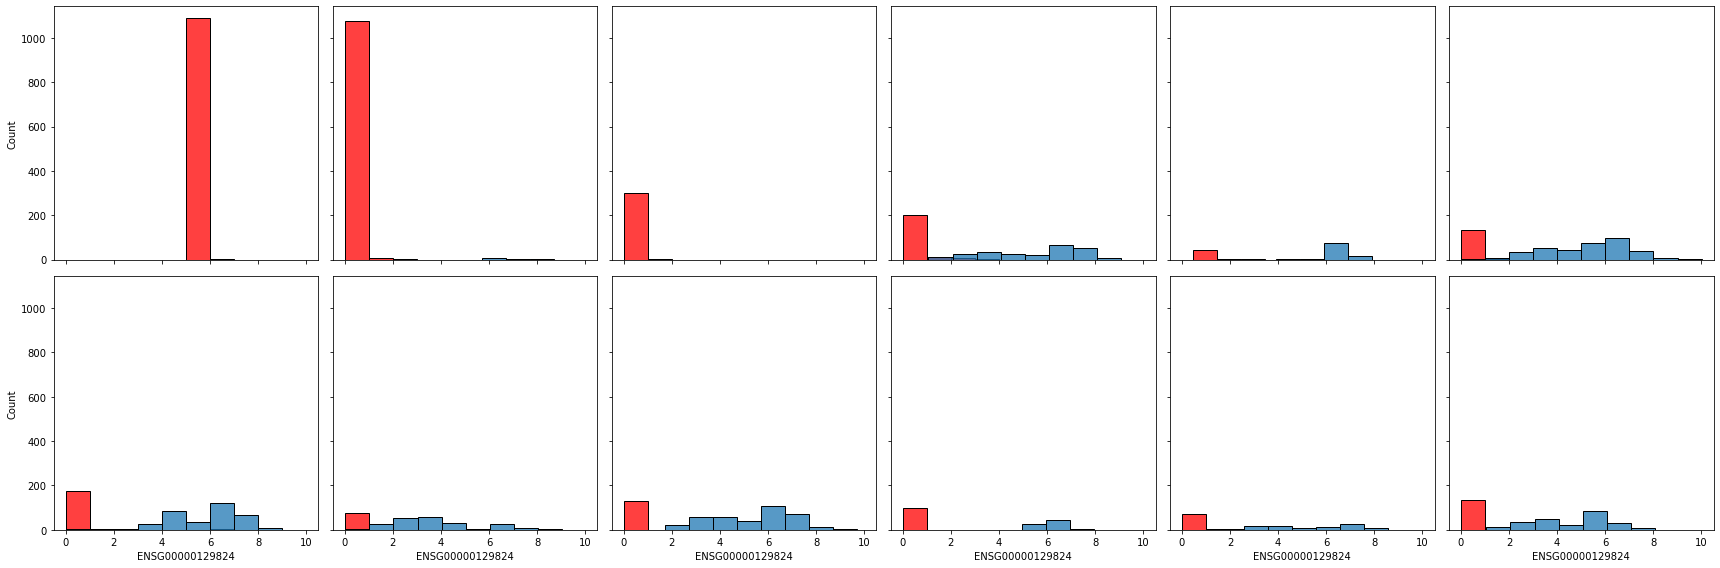

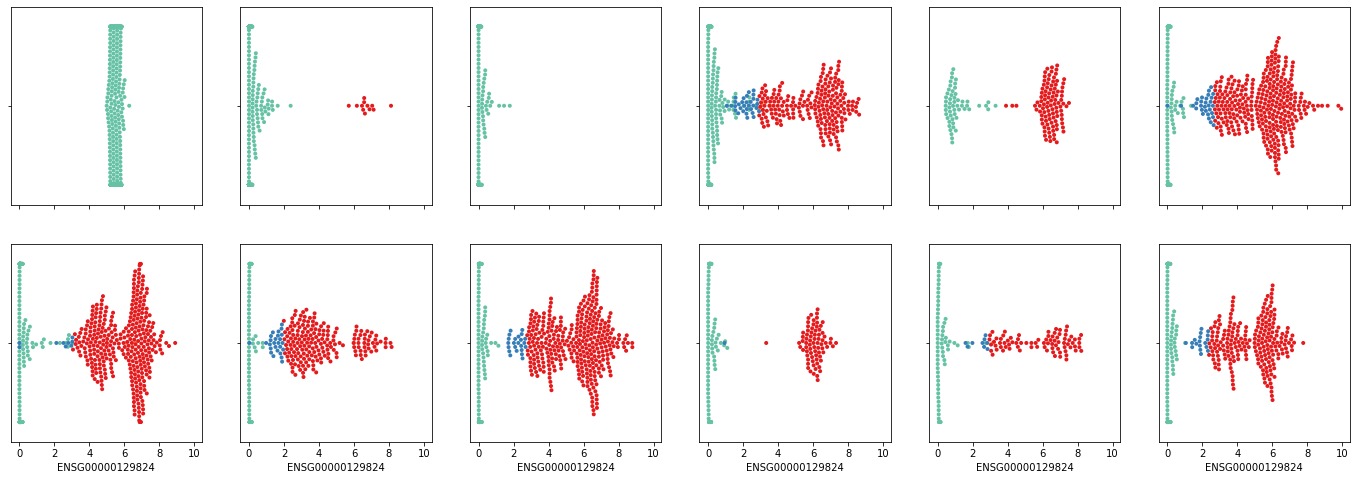

In [4]:
fig, axs = plt.subplots(2, 6, figsize=(24,8), sharex=True, sharey=True)
fig2, axs2 = plt.subplots(2, 6, figsize=(24,8), sharex=True, sharey=True)

i = j = 0
for cohort in ct_sels_init:
    print(cohort)
    # read single data
    expr = get_expression_data(cohort)
    pheno = get_pheno_data(cohort)
    # align pheno and expr
    pheno, expr = align(pheno, expr)
    try:
        pheno = pheno[pheno['gender.demographic'].notna()]
        pheno_data = pheno[pheno['gender.demographic'] != 'not reported']
        samples_f = pheno.loc[pheno['gender.demographic'].astype('string').str.strip() == 'female'].index.tolist()
        samples_m = pheno.loc[pheno['gender.demographic'].astype('string').str.strip() == 'male'].index.tolist()
    except:
        pheno = pheno[pheno['Sex'].notna()]
        samples_f = pheno.loc[pheno['Sex'].astype('string').str.strip() == 'Female'].index.tolist()
        samples_m = pheno.loc[pheno['Sex'].astype('string').str.strip() == 'Male'].index.tolist()
        
    expr_f = pd.DataFrame(expr.loc[samples_f][gene], columns=[gene])
    expr_m = pd.DataFrame(expr.loc[samples_m][gene], columns=[gene])

    expr_f['dev_f'] = abs(expr_f[gene] - expr_f[gene].mean())
    expr_f['dev_m'] = abs(expr_f[gene] - expr_m[gene].mean())
    expr_f['mismatch'] = expr_f['dev_m']<expr_f['dev_f']
    print('possible mismatches, females: ' + str(len(expr_f[expr_f['mismatch']])))

    expr_m['dev_m'] = abs(expr_m[gene] - expr_m[gene].mean())
    expr_m['dev_f'] = abs(expr_m[gene] - expr_f[gene].mean())
    expr_m['mismatch'] = expr_m['dev_f']<expr_m['dev_m']
    print('possible mismatches, men: ' + str(len(expr_m[expr_m['mismatch']])))
    
    print('\nmax female: ' + str(expr_f[gene].max()))
    print('min male: ' + str(expr_m[gene].min()))
    
    sns.histplot(expr.loc[samples_f][gene], binwidth=1, kde=False, ax=axs[j,i], color='red')
    sns.histplot(expr.loc[samples_m][gene], binwidth=1, kde=False, ax=axs[j,i])
    axs[j,i].title.set_text(cohort)

    sns.swarmplot(expr_f, x=gene, ax=axs2[j,i], hue='mismatch', palette=sns.color_palette("Set2"), size=2, legend=False)
    sns.swarmplot(expr_m, x=gene, ax=axs2[j,i], hue='mismatch', palette=sns.color_palette("Set1"), size=2, legend=False)
    axs2[j,i].title.set_text(cohort)

    i += 1
    if i == 6:
        i = 0
        j += 1
    print('\n')
        
fig.tight_layout()


BRCA_metabric
0
0


BRCA
1084
0


CESC
0
0


COAD
221
0


GBM
54
0


HNSC
133
0


KIRC
186
0


KIRP
76
0


LUSC
130
0


PCPG
101
0


READ
75
0


STAD
134
0




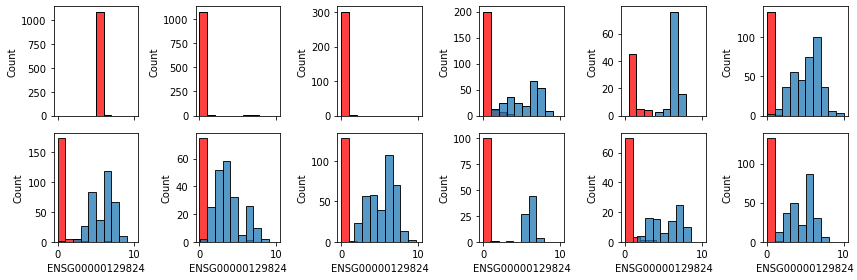

In [7]:
fig, axs = plt.subplots(2, 6, figsize=(12,4), sharex=True, sharey=False)
i = j = 0
for cohort in ct_sels_init:
    print(cohort)
    # read single data
    expr = get_expression_data(cohort)
    pheno = get_pheno_data(cohort)
    # align pheno and expr
    pheno, expr = align(pheno, expr)
    try:
        pheno = pheno[pheno['gender.demographic'].notna()]
        pheno_data = pheno[pheno['gender.demographic'] != 'not reported']
        samples_f = pheno.loc[pheno['gender.demographic'].astype('string').str.strip() == 'female'].index.tolist()
        samples_m = pheno.loc[pheno['gender.demographic'].astype('string').str.strip() == 'male'].index.tolist()
    except:
        pheno = pheno[pheno['Sex'].notna()]
        samples_f = pheno.loc[pheno['Sex'].astype('string').str.strip() == 'Female'].index.tolist()
        samples_m = pheno.loc[pheno['Sex'].astype('string').str.strip() == 'Male'].index.tolist()
        
    expr_f = pd.DataFrame(expr.loc[samples_f][gene], columns=[gene])
    expr_m = pd.DataFrame(expr.loc[samples_m][gene], columns=[gene])

    expr_f['z_f'] = (expr_f[gene] - expr_f[gene].mean())/expr_f[gene].std(ddof=0)
    expr_f['z_m'] = (expr_f[gene] - expr_m[gene].mean())/expr_f[gene].std(ddof=0)
    print(len(expr_f[expr_f['z_m']<expr_f['z_f']]))

    expr_m['z_m'] = (expr_m[gene] - expr_m[gene].mean())/expr_m[gene].std(ddof=0)
    expr_m['z_f'] = (expr_m[gene] - expr_f[gene].mean())/expr_m[gene].std(ddof=0)
    print(len(expr_m[expr_m['z_f']<expr_m['z_m']]))
    
    sns.histplot(expr.loc[samples_f][gene], binwidth=1, kde=False, ax=axs[j,i], color='red')
    sns.histplot(expr.loc[samples_m][gene], binwidth=1, kde=False, ax=axs[j,i])

    i += 1
    if i == 6:
        i = 0
        j += 1
    print('\n')
        
fig.tight_layout()